In [29]:
import numpy as np
import pandas as pd
V1=np.array([1,3,6,np.NaN,12,32,24,np.NaN,3])
V2=np.array([3,4,2,12,np.NaN,12,2,24,np.NaN])
V3=np.array([4,1,12,2,42,3,21,np.NaN,1])
df=pd.DataFrame({"V1":V1,"V2":V2,"V3":V3}) #unutma böyle bir işlemi yani liste halinde yazmayı ("v1":V1i ) süslü parantezle yaparsın
df

,V1,V2,V3
0,1.0,3.0,4.0
1,3.0,4.0,1.0
2,6.0,2.0,12.0
3,NaN,12.0,2.0
4,12.0,NaN,42.0
5,32.0,12.0,3.0
6,24.0,2.0,21.0
7,NaN,24.0,NaN
8,3.0,NaN,1.0


In [9]:
df.isnull().sum() #eksik değerleri gösterir

V1    2
V2    2
V3    1
dtype: int64

In [11]:
df.notnull().sum()

V1    7
V2    7
V3    8
dtype: int64

In [12]:
df.isnull().sum().sum()

5

In [13]:
df.isnull()

,V1,V2,V3
0,False,False,False
1,False,False,False
2,False,False,False
3,True,False,False
4,False,True,False
5,False,False,False
6,False,False,False
7,True,False,True
8,False,True,False


df[df.isnull().any(axis=1)] 

In [16]:
df[df.isnull().any(axis=1)] #en az 1 eksik değer varsa seç

,V1,V2,V3
3,NaN,12.0,2.0
4,12.0,NaN,42.0
7,NaN,24.0,NaN
8,3.0,NaN,1.0


In [21]:
df[df.notnull().all(axis=1)] #hepsi dolu olanları gösterri

,V1,V2,V3
0,1.0,3.0,4.0
1,3.0,4.0,1.0
2,6.0,2.0,12.0
5,32.0,12.0,3.0
6,24.0,2.0,21.0


In [23]:
df.dropna() # eksik değerlerin hepsi silinir ctrl ö bu kısmı açar inplace true bunu kalıcı hale getirir

,V1,V2,V3
0,1.0,3.0,4.0
1,3.0,4.0,1.0
2,6.0,2.0,12.0
5,32.0,12.0,3.0
6,24.0,2.0,21.0


In [27]:
#basit değer atama
df["V1"]
ort=df["V1"].mean()
df["V1"].fillna(ort)

0     1.000000
1     3.000000
2     6.000000
3    11.571429
4    12.000000
5    32.000000
6    24.000000
7    11.571429
8     3.000000
Name: V1, dtype: float64

In [28]:
df["V2"].fillna(0)

0     3.0
1     4.0
2     2.0
3    12.0
4     0.0
5    12.0
6     2.0
7    24.0
8     0.0
Name: V2, dtype: float64

In [31]:
#apply sütunlar üzerinde işlem yapma fonktur.
df.apply(lambda x: x.fillna(x.mean()) , axis =0)

,V1,V2,V3
0,1.000000,3.000000,4.00
1,3.000000,4.000000,1.00
2,6.000000,2.000000,12.00
3,11.571429,12.000000,2.00
4,12.000000,8.428571,42.00
5,32.000000,12.000000,3.00
6,24.000000,2.000000,21.00
7,11.571429,24.000000,10.75
8,3.000000,8.428571,1.00


In [32]:
!pip install missingno

  Obtaining dependency information for missingno from https://files.pythonhosted.org/packages/87/22/cd5cf999af21c2f97486622c551ac3d07361ced8125121e907f588ff5f24/missingno-0.5.2-py3-none-any.whl.metadata


In [34]:
import missingno as msno

<Axes: >

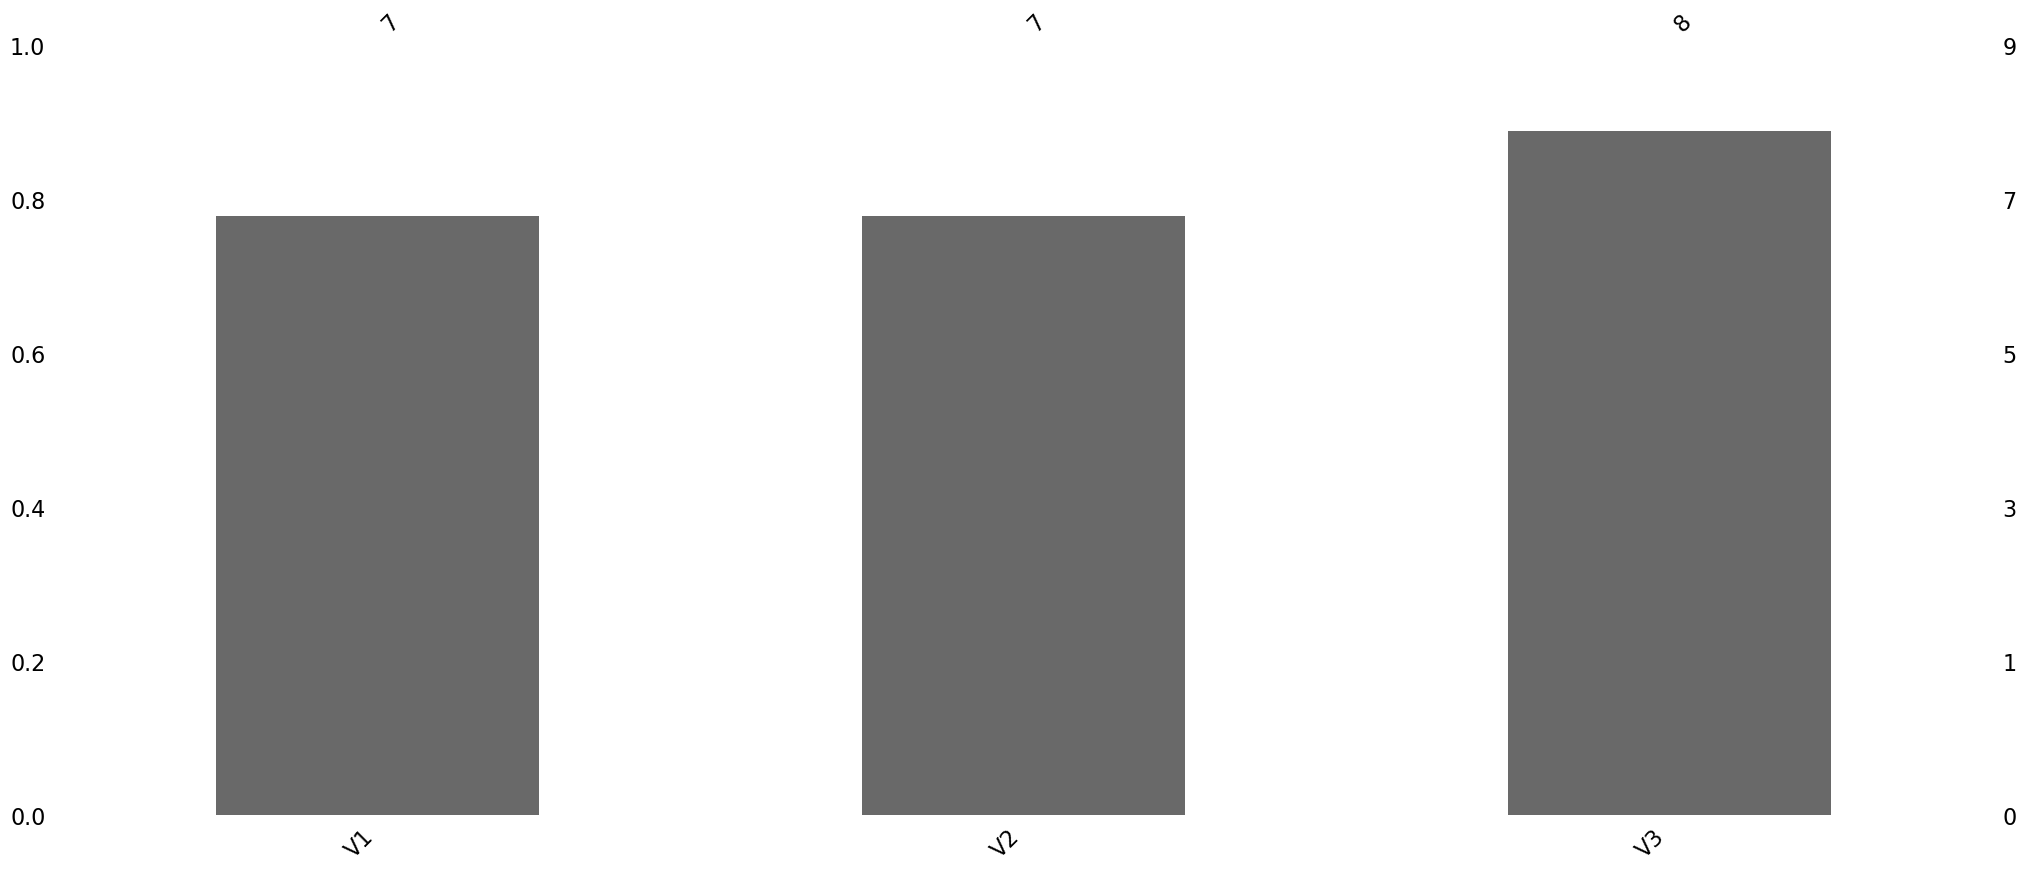

In [35]:
msno.bar(df)

<Axes: >

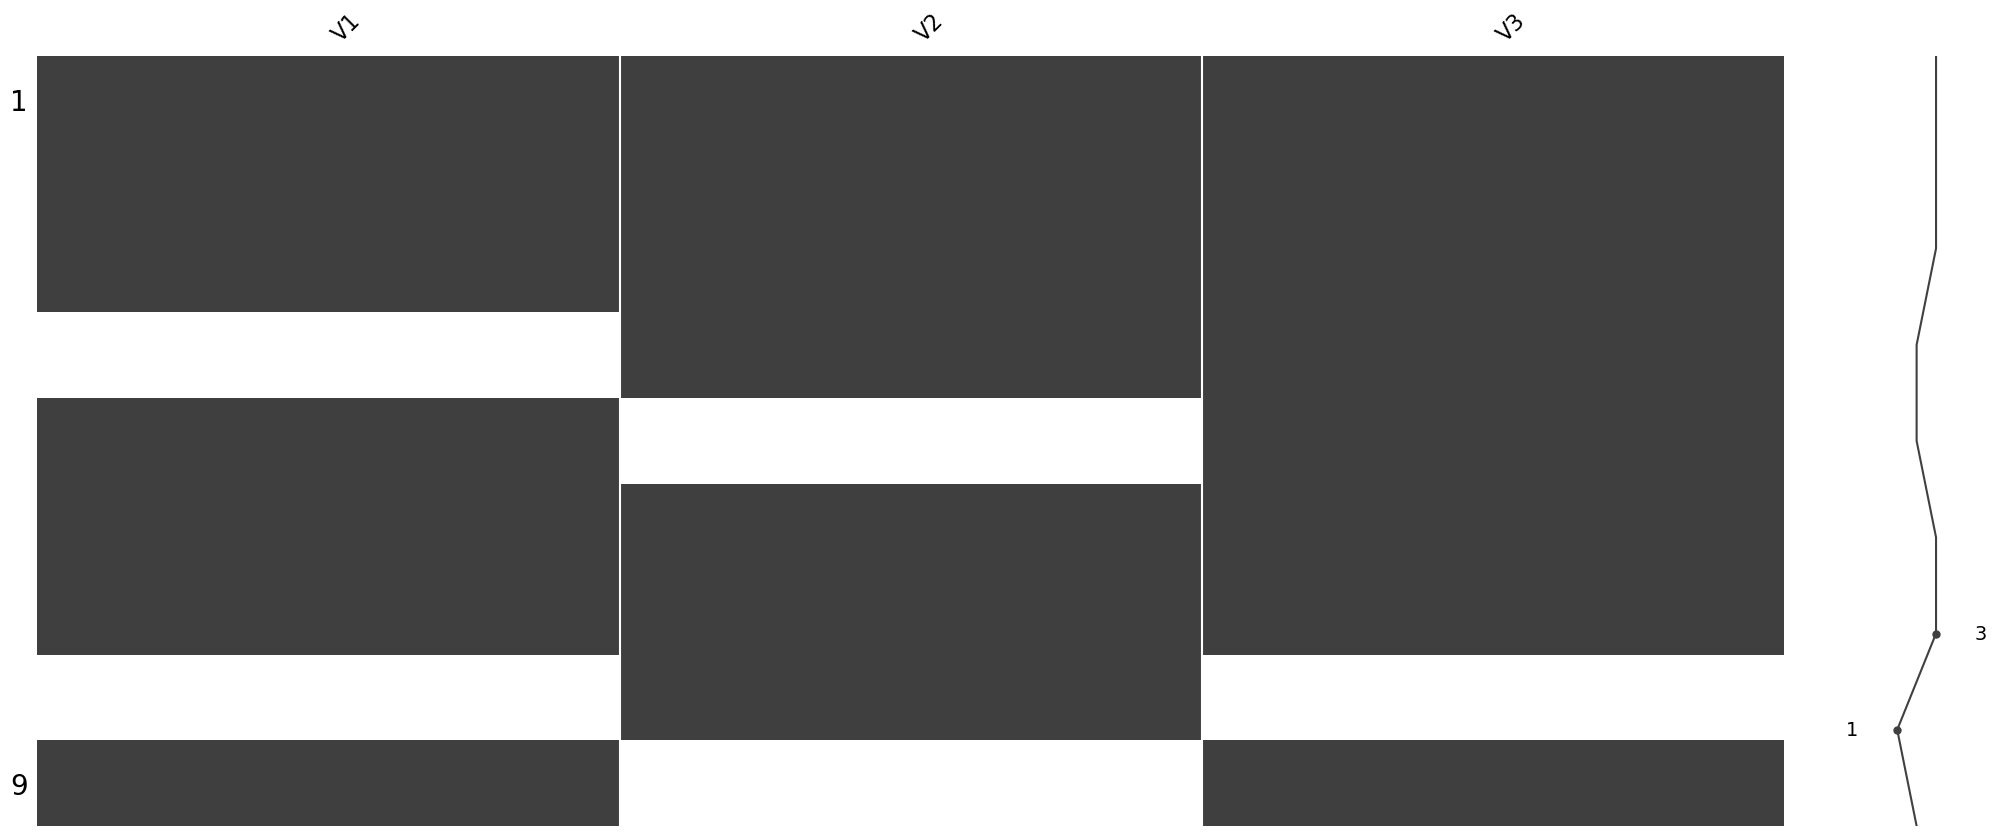

In [37]:
msno.matrix(df) #eksik olan değerlerin rassalarını yapısal mı deilmi incelemek için yardımda bulunur

In [38]:
df

,V1,V2,V3
0,1.0,3.0,4.0
1,3.0,4.0,1.0
2,6.0,2.0,12.0
3,NaN,12.0,2.0
4,12.0,NaN,42.0
5,32.0,12.0,3.0
6,24.0,2.0,21.0
7,NaN,24.0,NaN
8,3.0,NaN,1.0


In [39]:
import seaborn as sns
df=sns.load_dataset("planets")
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [40]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

<Axes: >

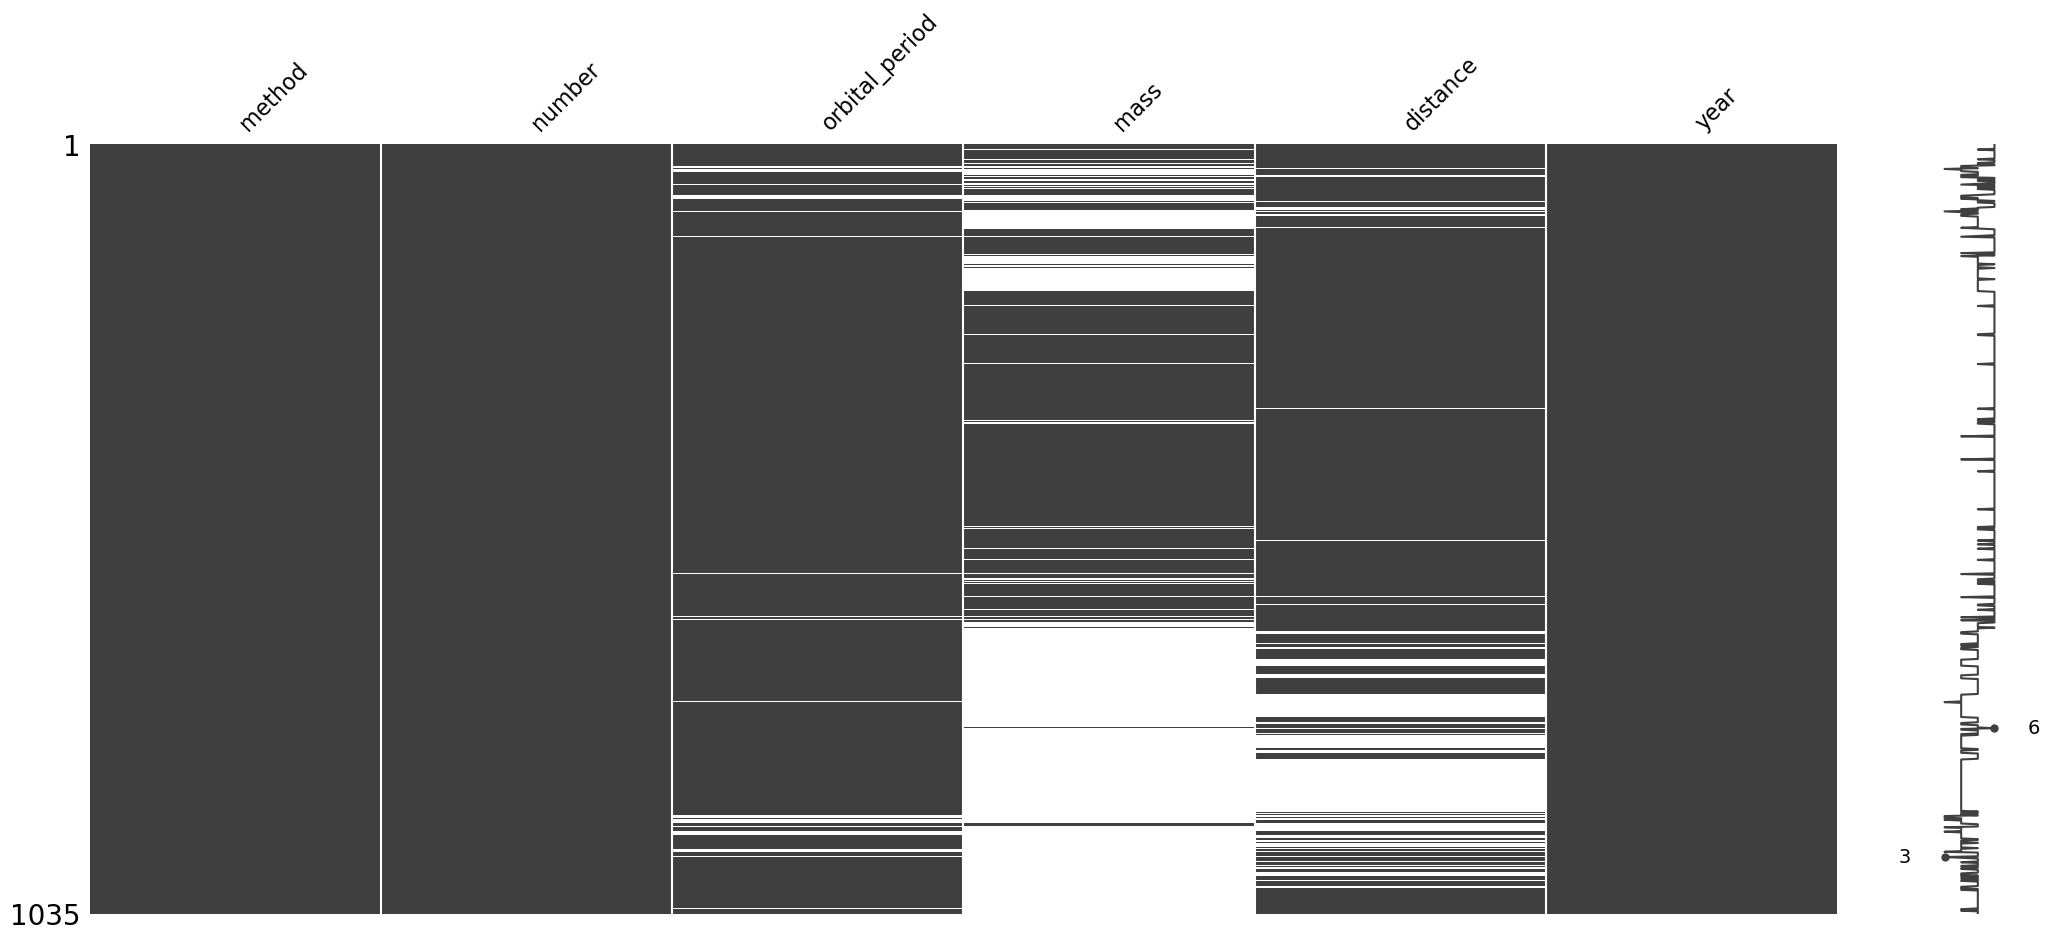

In [41]:
msno.matrix(df)  #masstaki değişimler orbital perioda göre gerçekleşmiş kredi kartı örneği gibi kredi kartı olmayan 
#kişileri nasıl kredi kartı harcaması olabilir gibi yani bağlılık

<Axes: >

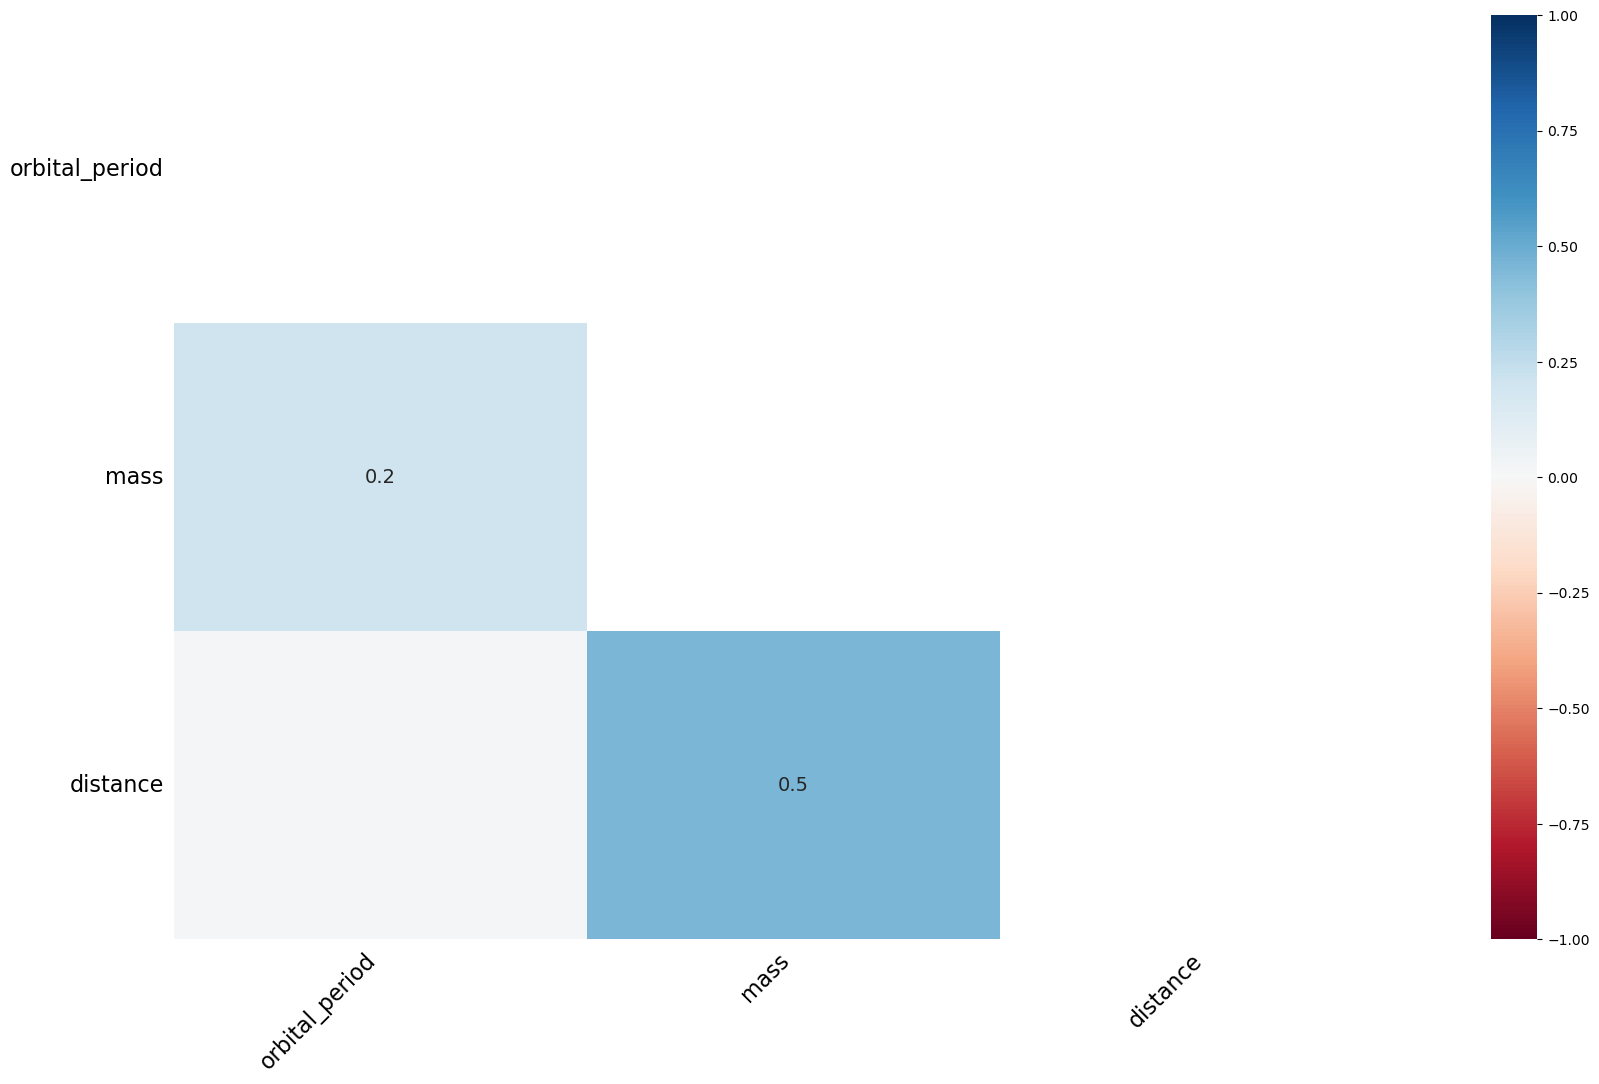

In [42]:
msno.heatmap(df) #ısı haritası  çok  önemli bir korelasyon yapısını verir nulity correlation - + 1 arasında alır  
# korelasyon ilişki demektir  nulity yokluk boşluk yani eksikliği ifade eder   eksik korelasynu  yani bize nümerik olarak ifade ed
# 2 değişkenin nulity coorelationu 1 inse çok yüksek korelasyonla birlikte
#diğer değişkendede eksiklik görecez ve riskli bir durum 
# mass değişekinin ve distance arasında %50 bir nulity korelasyon var 